In [11]:
from data.dataset import Dataset
from data.feature import Featurizer
from data.dataloader import DataLoader
from methods.ridge_method import RidgeMethod

import numpy as np
from visualize import visualize_energy

In [2]:
featurizer = Featurizer()
dimer_dataset = Dataset.from_file('xe2_50.xyz', 2, featurizer)
trimer_dataset = Dataset.from_file('xe3_50.xyz', 3, featurizer)
rand_trimer_dataset = Dataset.from_file('xe3_dataset_dft.xyz', 3, featurizer)

dimer_train, dimer_val = dimer_dataset.split(
    [list(range(40)),
     list(range(40, 50))])
trimer_train, trimer_val = trimer_dataset.split(
    [list(range(40)),
     list(range(40, 50))])
rand_trimer_train, rand_trimer_val = rand_trimer_dataset.split(
    [[], 
     list(range(len(rand_trimer_dataset)))])

train = DataLoader([dimer_train, trimer_train, rand_trimer_train])
val = DataLoader([dimer_val, trimer_val, rand_trimer_val])

In [3]:
from importlib import reload

In [4]:
method = RidgeMethod(train)

In [5]:
method.train()

In [7]:
dimer_energy = method.predict(dimer_dataset.X) * 2
trimer_energy = method.predict(trimer_dataset.X) * 3

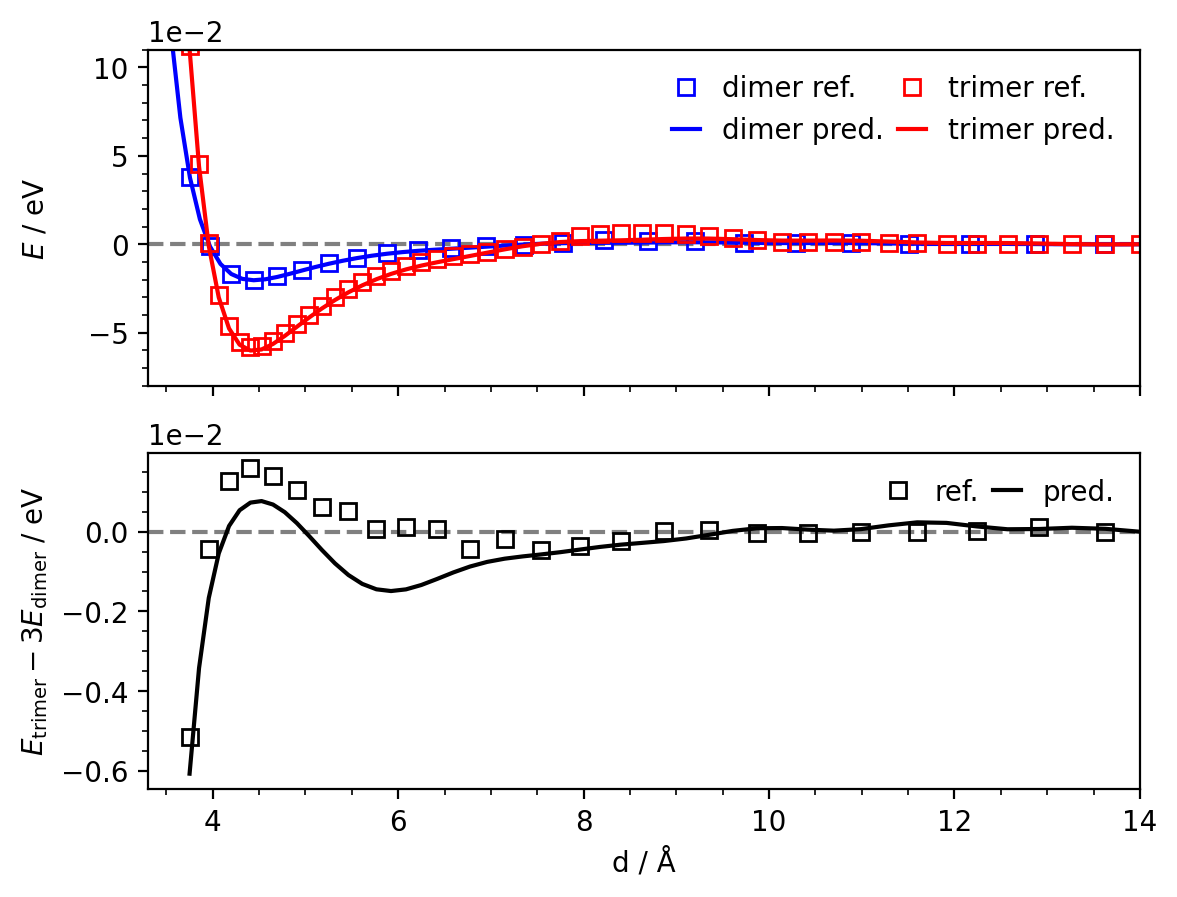

In [10]:
visualize_energy(dimer_dataset, dimer_energy - dimer_energy[-1], trimer_dataset, trimer_energy - trimer_energy[-1])